# 🎓 Student Dropout & Academic Success Prediction — Machine Learning Project

## 🔍 Project Overview

This project develops a predictive analytics system to identify whether a university student is likely to **Dropout**, **Continue Enrolled**, or **Graduate based on academic**, **demographic**, and **socio-economic attributes**.

- **Dataset:** Predict Students' Dropout and Academic Success' – `data 2.csv`
- **Target Variable:** `Target`  
  - `Dropout` → student left university before completion
  - `Enrolled` → student is still studying
  - `Graduate` → student successfully completed the course

## 🎯 Real-World Goals of the Project

1️⃣ **Early Detection of At-Risk Students**

     Identify dropouts early so the university can provide counseling, financial aid, or academic support.

2️⃣ **Improve Resource Allocation**

     Allocate limited resources (mentors, tutors, workshops) to students with the highest dropout risk.

3️⃣ **Academic & Policy Strategy Evaluation**

     Understand how factors such as admission grade, scholarship status, tuition fee payment, and course load influence.

4️⃣ **Data-Driven Decision Making**

     Support university management in developing policies to improve retention and graduation rates.

5️⃣ **Boost Educational Outcomes**

     Help reduce dropout rates and improve student success using insights from machine learning.

## 🔬 What This Notebook Covers

| Step                                      | Description                                                                               |
| ----------------------------------------- | ----------------------------------------------------------------------------------------- |
| **1. Data Exploration (EDA)**             | Visualizing class distribution, academic patterns, and student demographics               |
| **2. Data Cleaning**                      | Removing inconsistent values and preparing dataset for modeling                           |
| **3. Feature Engineering**                | Creating new variables such as academic performance score, workload, economic score, etc. |
| **4. Train/Test Split & Scaling**         | Preparing the dataset for modeling                                                        |
| **5. Model Training**                     | Logistic Regression, Decision Tree, Random Forest, KNN, SVM, MLP (Neural Network)         |
| **6. Model Evaluation**                   | Accuracy, Precision, Recall, F1-Score, Confusion Matrices, Cross-Validation               |
| **7. Ensemble Learning**                  | Bagging & Gradient Boosting                                                               |
| **8. Unsupervised Learning (Clustering)** | K-Means clustering to understand hidden student patterns                                  |




## 1. Import Libraries

In [63]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score


import warnings
warnings.filterwarnings('ignore')


## 2. Load and Explore Data

In [64]:
df = pd.read_csv("data 2.csv", sep=";")

print("Shape of data:", df.shape)
print(f"\nFirst few rows:")
df.head()


Shape of data: (4424, 37)

First few rows:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [65]:
# Basic statistics
print("Dataset Information:")
print(df.info())
print("\nDescribe dataset:")
df.describe()
print("\nMissing Values:")
print(df.isnull().sum().sum(), "missing values found")
print("\nTarget Distribution:")
print(df['GDP'].value_counts())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualificati

In [66]:
# Create binary target
df["pass"] = df["Debtor"].apply(lambda x: 1 if x == 2 else 0)

# Check distribution
print("Pass value counts:")
print(df["pass"].value_counts())
print("\nPass distribution (normalized):")
print(df["pass"].value_counts(normalize=True))

# Drop original Target column
df = df.drop(columns=["Debtor"])


Pass value counts:
pass
0    4424
Name: count, dtype: int64

Pass distribution (normalized):
pass
0    1.0
Name: proportion, dtype: float64


## 3. Data Cleaning

In [67]:
# Make a copy
df_clean = df.copy()

print(f"Before cleaning: {df_clean.shape[0]} rows")

# 1. Age at enrollment (valid range for university students)
df_clean = df_clean[(df_clean['Age at enrollment'] >= 15) &
                    (df_clean['Age at enrollment'] <= 60)]

# 2. Previous qualification grade (valid: 0–200)
df_clean = df_clean[(df_clean['Previous qualification (grade)'] >= 0) &
                    (df_clean['Previous qualification (grade)'] <= 200)]

# 3. Admission grade (valid: 0–200)
df_clean = df_clean[(df_clean['Admission grade'] >= 0) &
                    (df_clean['Admission grade'] <= 200)]

# 4. Unit grades 1st and 2nd sem (valid: 0–20)
df_clean = df_clean[(df_clean['Curricular units 1st sem (grade)'] >= 0) &
                    (df_clean['Curricular units 1st sem (grade)'] <= 20)]

df_clean = df_clean[(df_clean['Curricular units 2nd sem (grade)'] >= 0) &
                    (df_clean['Curricular units 2nd sem (grade)'] <= 20)]

# 5. Remove negative counts (credited/enrolled/evaluations/approved)
count_columns = [
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (without evaluations)',
]

for col in count_columns:
    df_clean = df_clean[df_clean[col] >= 0]

print(f"After cleaning: {df_clean.shape[0]} rows")
print(f"Removed: {df.shape[0] - df_clean.shape[0]} rows")


Before cleaning: 4424 rows
After cleaning: 4421 rows
Removed: 3 rows


## 4. Feature Engineering

In [68]:
df_clean = df_clean.copy()

# 1. Academic performance indicator
# If average of both semester grades >= 10 → good performance
df_clean['performance'] = df_clean.apply(
    lambda x: 1 if ((x['Curricular units 1st sem (grade)'] + 
                     x['Curricular units 2nd sem (grade)']) / 2) >= 10 else 0,
    axis=1
)

# 2. Average semester grade
df_clean['avg_sem_grade'] = (
    df_clean['Curricular units 1st sem (grade)'] +
    df_clean['Curricular units 2nd sem (grade)']
) / 2

# 3. Grade improvement from 1st sem → 2nd sem
df_clean['grade_improvement'] = (
    df_clean['Curricular units 2nd sem (grade)'] -
    df_clean['Curricular units 1st sem (grade)']
)

# 4. Study workload (how many subjects enrolled × evaluations)
df_clean['study_workload'] = (
    df_clean['Curricular units 1st sem (enrolled)'] +
    df_clean['Curricular units 2nd sem (enrolled)']
) * (
    df_clean['Curricular units 1st sem (evaluations)'] +
    df_clean['Curricular units 2nd sem (evaluations)']
)

# 5. Failure flag → if no. of approved < enrolled (poor performance)
df_clean['failure_flag'] = df_clean.apply(
    lambda x: 1 
    if ((x['Curricular units 1st sem (approved)'] < x['Curricular units 1st sem (enrolled)']) or
        (x['Curricular units 2nd sem (approved)'] < x['Curricular units 2nd sem (enrolled)']))
    else 0,
    axis=1
)

# 6. Parent education level combined
df_clean['parent_qualification'] = (
    df_clean["Mother's qualification"] +
    df_clean["Father's qualification"]
)

# 7. Economic indicator score (GDP - unemployment - inflation)
df_clean['economic_score'] = (
    df_clean['GDP'] -
    df_clean['Unemployment rate'] -
    df_clean['Inflation rate']
)

print("New features successfully created!")
print(df_clean.columns)



New features successfully created!
Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Cu

## 5. Quick Visualization

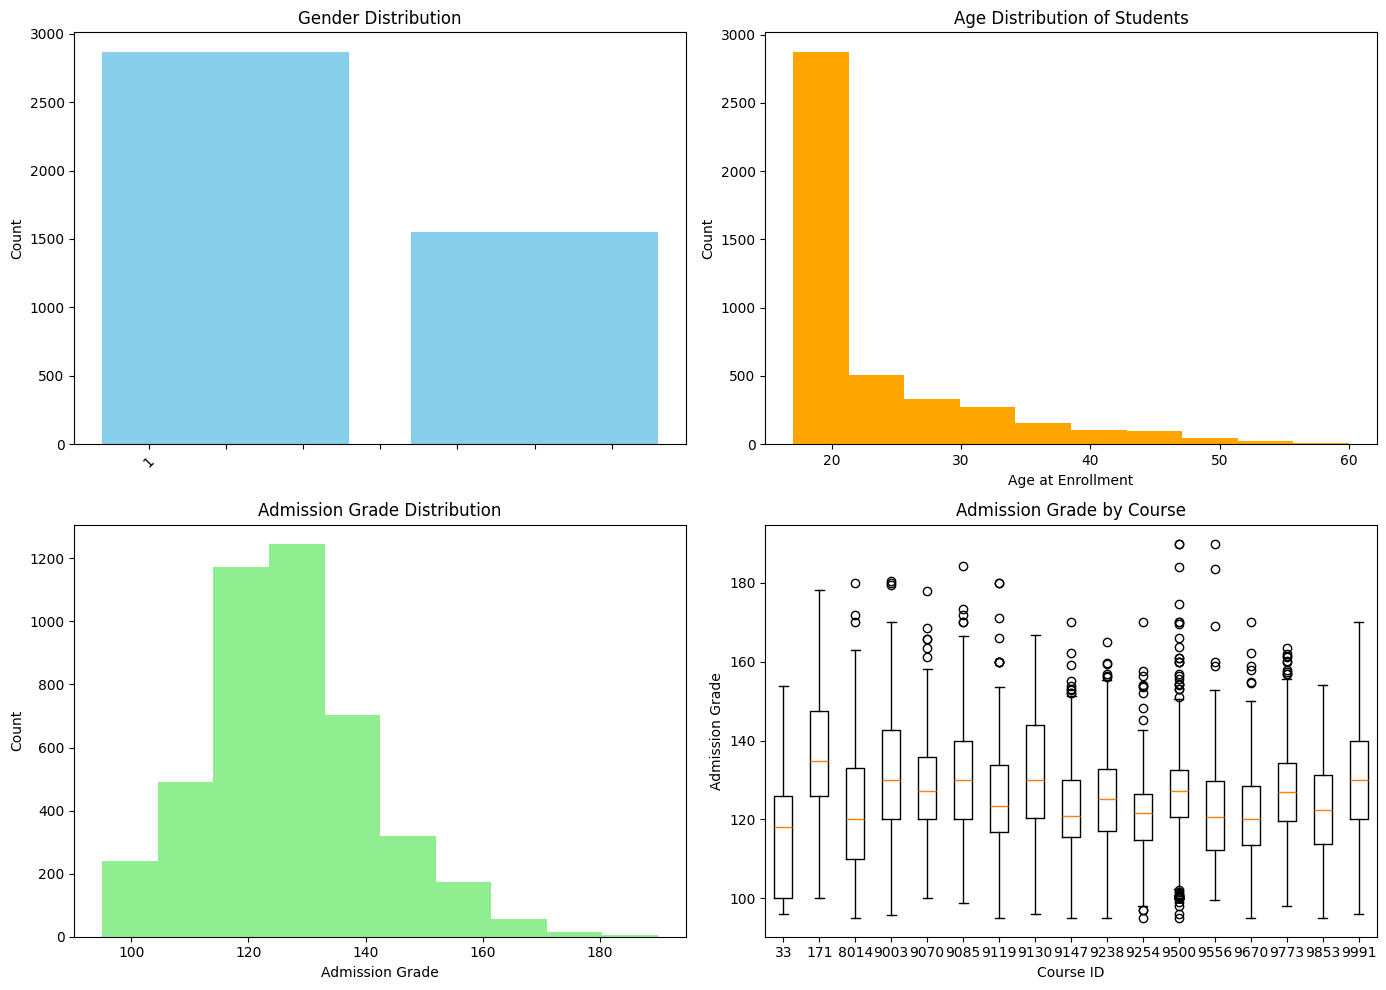

In [69]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Distribution Plot (using another column instead of 'Target')
#  Change 'Gender' to any other categorical column you want (like 'Course', 'Marital status', etc.)
if 'Gender' in df_clean.columns:
    column_to_plot = 'Gender'
else:
    # fallback: pick any categorical column available
    categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns
    column_to_plot = categorical_cols[0] if len(categorical_cols) > 0 else df_clean.columns[0]

col_counts = df_clean[column_to_plot].value_counts()

axes[0, 0].bar(col_counts.index, col_counts.values, color='skyblue')
axes[0, 0].set_title(f'{column_to_plot} Distribution')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xticklabels(col_counts.index, rotation=45)

# 2. Age Distribution Histogram
if 'Age at enrollment' in df_clean.columns:
    axes[0, 1].hist(df_clean['Age at enrollment'], bins=10, color='orange')
    axes[0, 1].set_title('Age Distribution of Students')
    axes[0, 1].set_xlabel('Age at Enrollment')
    axes[0, 1].set_ylabel('Count')

# 3. Admission Grade Histogram
if 'Admission grade' in df_clean.columns:
    axes[1, 0].hist(df_clean['Admission grade'], bins=10, color='lightgreen')
    axes[1, 0].set_title('Admission Grade Distribution')
    axes[1, 0].set_xlabel('Admission Grade')
    axes[1, 0].set_ylabel('Count')

# 4. Course vs Admission Grade
if 'Course' in df_clean.columns and 'Admission grade' in df_clean.columns:
    courses = sorted(df_clean['Course'].unique())
    data_by_course = [df_clean[df_clean['Course'] == c]['Admission grade'] for c in courses]

    axes[1, 1].boxplot(data_by_course, labels=courses)
    axes[1, 1].set_title('Admission Grade by Course')
    axes[1, 1].set_xlabel('Course ID')
    axes[1, 1].set_ylabel('Admission Grade')

plt.tight_layout()
plt.show()

## 6. Prepare Data for Modeling

In [70]:
# Target Encoding
label = LabelEncoder()
df_clean["Target_encoded"] = label.fit_transform(df_clean["Target"])

y = df_clean["Target_encoded"]

features = [
    "Age at enrollment",
    "Admission grade",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)",
    "Scholarship holder",
    "Tuition fees up to date",
    "International"
]

# Select only available columns
X = df_clean[features]

# ----- Train–Test Split -----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----- Standard Scaling -----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])
print("Total features:", len(features))


Training samples: 3536
Testing samples: 885
Total features: 11


## 7. Train Classification Models

We'll train 5 essential models for comparison.

In [71]:
# ----- Initialize Models -----

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=2000, multi_class='ovr'),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Random Forest': RandomForestClassifier(n_estimators=150, random_state=42, max_depth=20),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=15),
    'Support Vector Machine': SVC(kernel='rbf', random_state=42)
}

results = []
print("Training models...\n")

for name, model in models.items():

    # --------- Fit and Predict ---------
    if name in ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # --------- Multi-class Metrics (Weighted) ---------
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Save results
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

    # Print individual model scores
    print(f"{name}:")
    print(f"  Accuracy : {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall   : {rec:.4f}")
    print(f"  F1-Score : {f1:.4f}\n")

# --------- Results DataFrame ---------
results_df = pd.DataFrame(results).sort_values('Accuracy', ascending=False)

print("\n" + "*"*70)
print("MODEL COMPARISON")
print("*"*70)
print(results_df.to_string(index=False))


Training models...

Logistic Regression:
  Accuracy : 0.7514
  Precision: 0.7295
  Recall   : 0.7514
  F1-Score : 0.7132

Decision Tree:
  Accuracy : 0.7198
  Precision: 0.7056
  Recall   : 0.7198
  F1-Score : 0.7106

Random Forest:
  Accuracy : 0.7514
  Precision: 0.7374
  Recall   : 0.7514
  F1-Score : 0.7394

K-Nearest Neighbors:
  Accuracy : 0.7446
  Precision: 0.7262
  Recall   : 0.7446
  F1-Score : 0.7275

Support Vector Machine:
  Accuracy : 0.7605
  Precision: 0.7523
  Recall   : 0.7605
  F1-Score : 0.7483


**********************************************************************
MODEL COMPARISON
**********************************************************************
                 Model  Accuracy  Precision   Recall  F1-Score
Support Vector Machine  0.760452   0.752341 0.760452  0.748308
   Logistic Regression  0.751412   0.729490 0.751412  0.713222
         Random Forest  0.751412   0.737409 0.751412  0.739374
   K-Nearest Neighbors  0.744633   0.726245 0.744633  0.727483
    

## 8. Visualize Model Performance

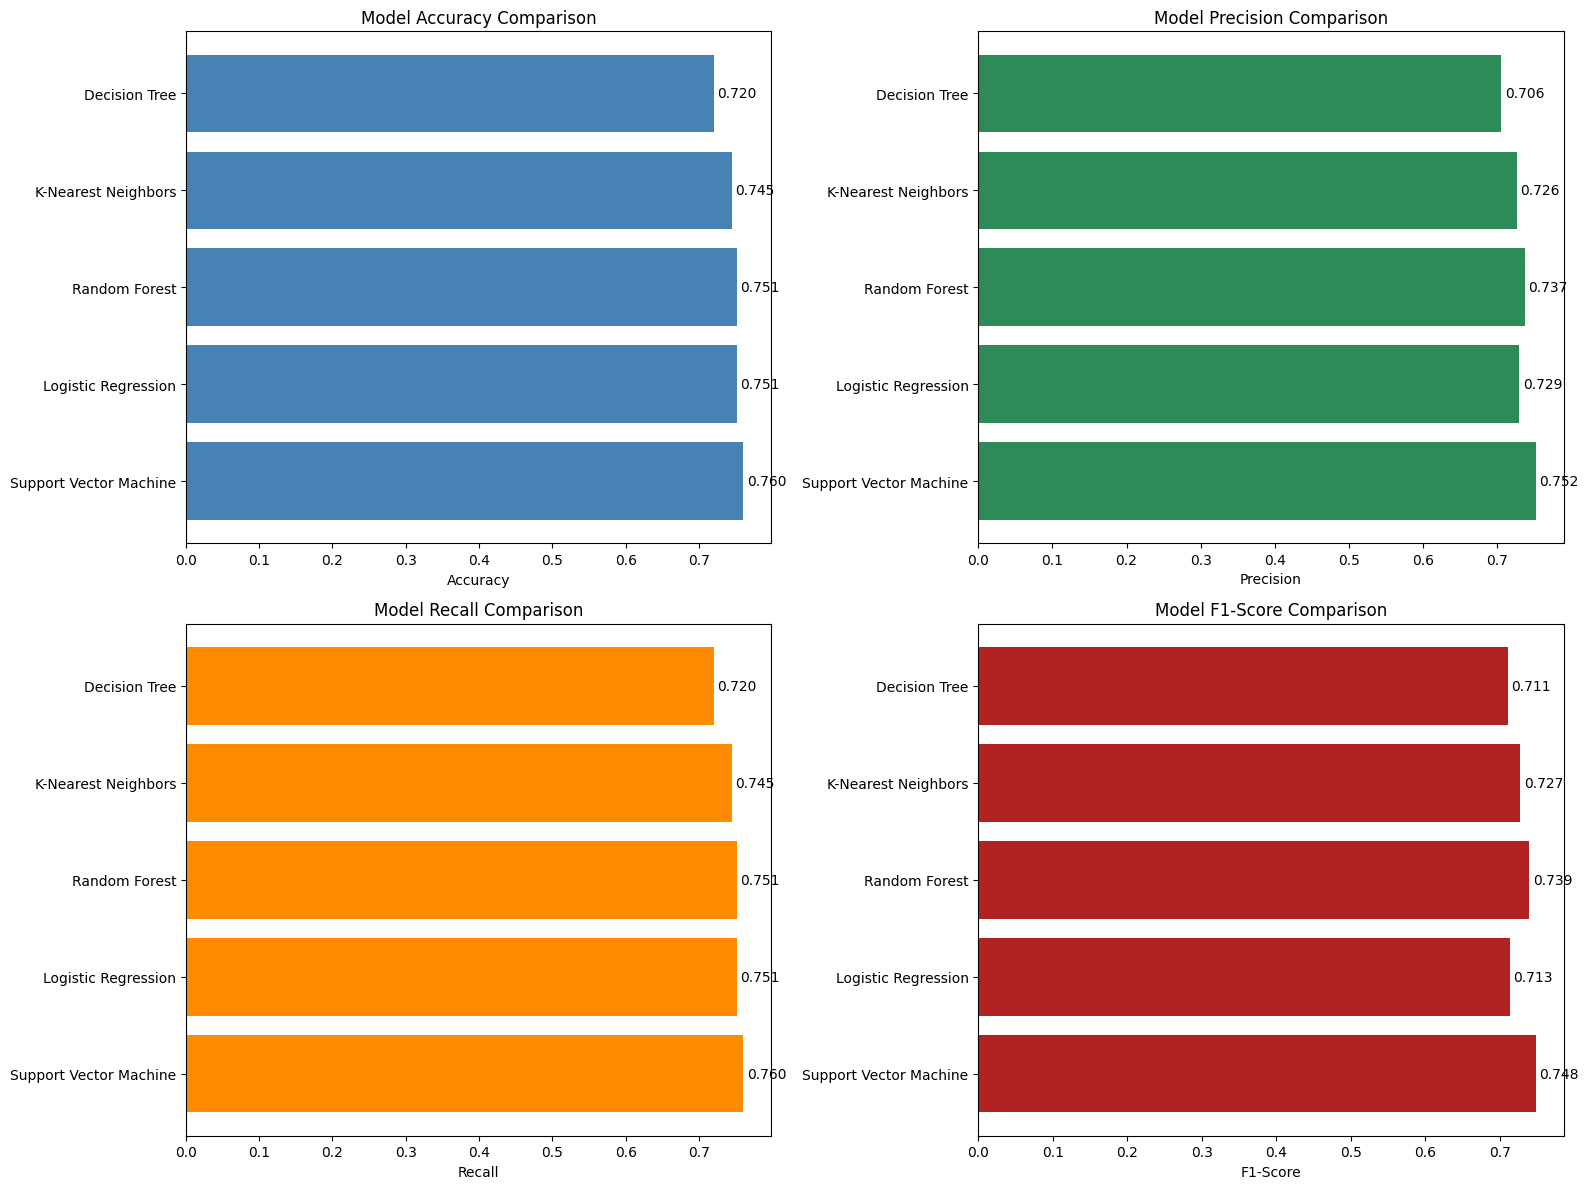

In [72]:
# ----- Plot model performance comparison -----

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# ---------------- Accuracy ----------------
axes[0, 0].barh(results_df['Model'], results_df['Accuracy'], color='steelblue')
axes[0, 0].set_title("Model Accuracy Comparison")
axes[0, 0].set_xlabel("Accuracy")

for i, v in enumerate(results_df['Accuracy']):
    axes[0, 0].text(v + 0.005, i, f'{v:.3f}', va='center')

# ---------------- Precision ----------------
axes[0, 1].barh(results_df['Model'], results_df['Precision'], color='seagreen')
axes[0, 1].set_title("Model Precision Comparison")
axes[0, 1].set_xlabel("Precision")

for i, v in enumerate(results_df['Precision']):
    axes[0, 1].text(v + 0.005, i, f'{v:.3f}', va='center')

# ---------------- Recall ----------------
axes[1, 0].barh(results_df['Model'], results_df['Recall'], color='darkorange')
axes[1, 0].set_title("Model Recall Comparison")
axes[1, 0].set_xlabel("Recall")

for i, v in enumerate(results_df['Recall']):
    axes[1, 0].text(v + 0.005, i, f'{v:.3f}', va='center')

# ---------------- F1-Score ----------------
axes[1, 1].barh(results_df['Model'], results_df['F1-Score'], color='firebrick')
axes[1, 1].set_title("Model F1-Score Comparison")
axes[1, 1].set_xlabel("F1-Score")

for i, v in enumerate(results_df['F1-Score']):
    axes[1, 1].text(v + 0.005, i, f'{v:.3f}', va='center')

plt.tight_layout()
plt.show()



## 9. Confusion Matrix for Best Model


Best Model Selected: Support Vector Machine


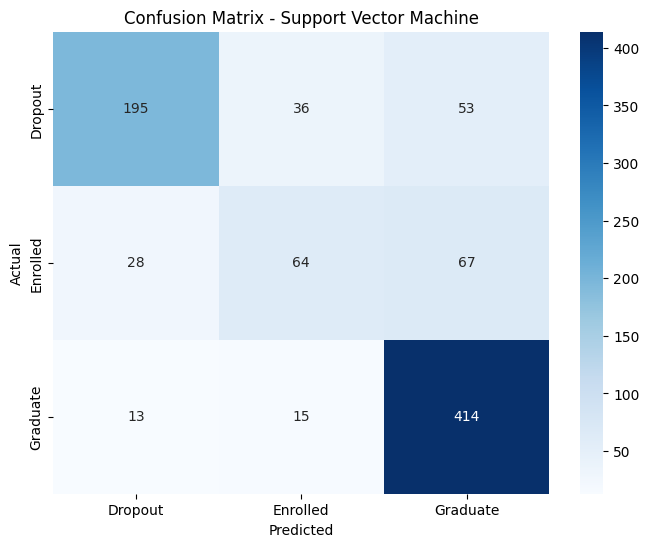


Classification Report - Support Vector Machine:
              precision    recall  f1-score   support

     Dropout       0.83      0.69      0.75       284
    Enrolled       0.56      0.40      0.47       159
    Graduate       0.78      0.94      0.85       442

    accuracy                           0.76       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.75      0.76      0.75       885



In [73]:
# ----- Get best model -----
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

print(f"\nBest Model Selected: {best_model_name}")

# ----- Predictions -----
if best_model_name in ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine']:
    y_pred_best = best_model.predict(X_test_scaled)
else:
    y_pred_best = best_model.predict(X_test)

# ----- Confusion Matrix -----
cm = confusion_matrix(y_test, y_pred_best)

# Class names from label encoder
class_names = label.classes_   # ["Dropout", "Enrolled", "Graduate"]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ----- Classification Report -----
print(f"\nClassification Report - {best_model_name}:")
print(classification_report(y_test, y_pred_best, target_names=class_names))


## 11. Principal Component Analysis (PCA)

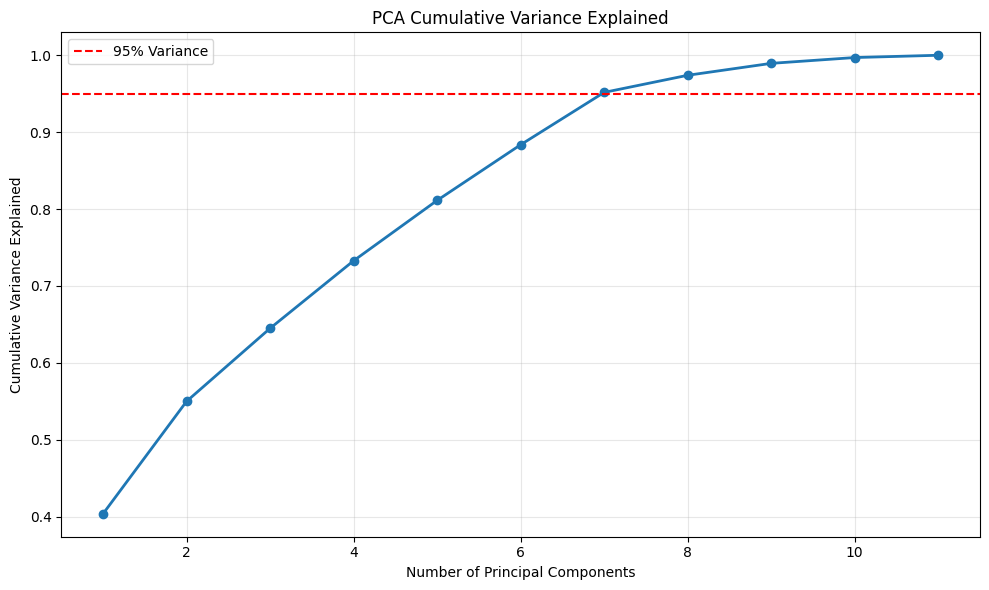


PCA Results for Dataset 2:
  • Total original features : 11
  • Components for 95% variance : 7
  • Dimensionality reduction : 11 → 7


In [74]:
# Apply PCA on scaled training data
pca = PCA()
pca.fit(X_train_scaled)

# Cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# ---- Plot PCA variance explained ----
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(cumulative_variance) + 1), 
    cumulative_variance, 
    marker='o', 
    linestyle='-', 
    linewidth=2
)

plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('PCA Cumulative Variance Explained')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

#  Optimal components (95% variance) 
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"\nPCA Results for Dataset 2:")
print(f"  • Total original features : {X_train.shape[1]}")
print(f"  • Components for 95% variance : {n_components_95}")
print(f"  • Dimensionality reduction : {X_train.shape[1]} → {n_components_95}")

## 12. Neural Network (MLP)

In [75]:
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    early_stopping=True
)

print("Training Neural Network (Multi-Class)...")
mlp.fit(X_train_scaled, y_train)

# Predictions
y_pred_mlp = mlp.predict(X_test_scaled)

# Probability output for all 3 classes
y_proba_mlp = mlp.predict_proba(X_test_scaled)

# Accuracy
mlp_acc = accuracy_score(y_test, y_pred_mlp)

print("\nNeural Network Performance:")
print("  Architecture: 12 → 64 → 32 → 3")
print(f"  Accuracy: {mlp_acc:.4f}")
print(f"  Iterations until convergence: {mlp.n_iter_}")

Training Neural Network (Multi-Class)...

Neural Network Performance:
  Architecture: 12 → 64 → 32 → 3
  Accuracy: 0.7763
  Iterations until convergence: 23


## 13. Cross-Validation

In [76]:
# Perform 5-fold cross-validation on best models
cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_models = {
    'Random Forest': RandomForestClassifier(n_estimators=150, random_state=42, max_depth=20),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=2000, multi_class='ovr')
}

print("5-Fold Cross-Validation Results:\n")

for name, model in cv_models.items():
    
    # Scale where required
    if name == 'Logistic Regression':
        scores = cross_val_score(
            model, X_train_scaled, y_train,
            cv=cv, scoring='accuracy'
        )
    else:
        scores = cross_val_score(
            model, X_train, y_train,
            cv=cv, scoring='accuracy'
        )
    
    print(f"{name}:")
    print(f"  Mean Accuracy : {scores.mean():.4f}")
    print(f"  Accuracy Std  : {scores.std():.4f}")
    print(f"  Fold Scores   : {[f'{s:.4f}' for s in scores]}\n")


5-Fold Cross-Validation Results:

Random Forest:
  Mean Accuracy : 0.7644
  Accuracy Std  : 0.0241
  Fold Scores   : ['0.7486', '0.8076', '0.7539', '0.7723', '0.7397']

Logistic Regression:
  Mean Accuracy : 0.7610
  Accuracy Std  : 0.0224
  Fold Scores   : ['0.7472', '0.7935', '0.7539', '0.7793', '0.7313']



## 14. Ensemble Methods

Training Ensemble Methods...


Ensemble Methods Comparison:
           Method  Accuracy
    Random Forest  0.751412
          Bagging  0.741243
Gradient Boosting  0.770621


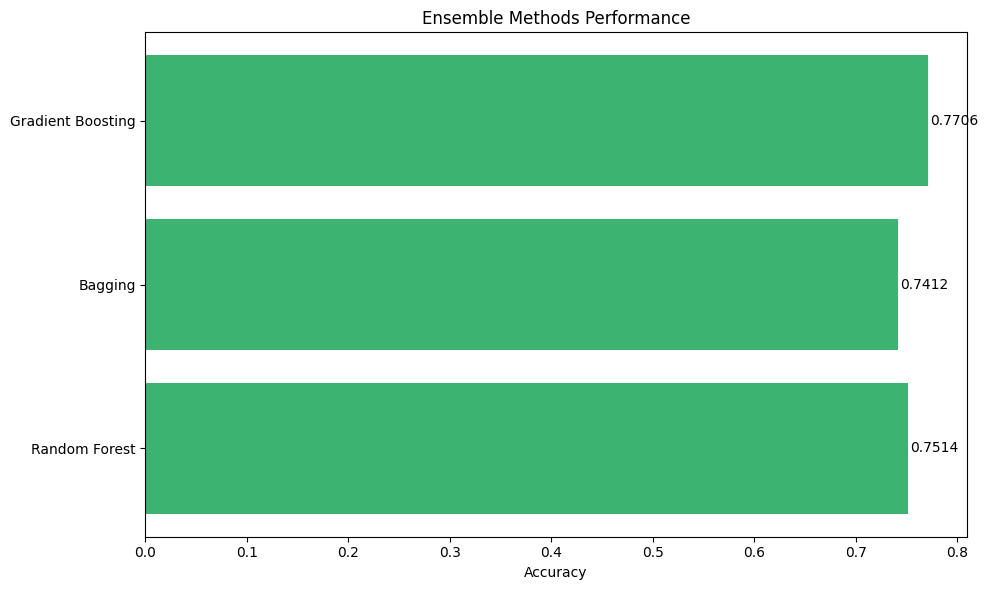

In [77]:
print("Training Ensemble Methods...\n")

# ----- Bagging (works without scaling) -----
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=60,
    random_state=42
)
bagging.fit(X_train, y_train)
bagging_acc = accuracy_score(y_test, bagging.predict(X_test))

# ----- Gradient Boosting -----
gb = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.08,
    max_depth=3,
    random_state=42
)
gb.fit(X_train, y_train)
gb_acc = accuracy_score(y_test, gb.predict(X_test))

# ----- Random Forest (your already trained model from results_df) -----
rf_accuracy = results_df[results_df['Model'] == 'Random Forest']['Accuracy'].values[0]

# ----- Combine results -----
ensemble_results = pd.DataFrame({
    'Method': ['Random Forest', 'Bagging', 'Gradient Boosting'],
    'Accuracy': [rf_accuracy, bagging_acc, gb_acc]
})

print("\nEnsemble Methods Comparison:")
print(ensemble_results.to_string(index=False))


# ----- Visualization -----
plt.figure(figsize=(10, 6))
plt.barh(ensemble_results['Method'], ensemble_results['Accuracy'], color='mediumseagreen')
plt.xlabel('Accuracy')
plt.title('Ensemble Methods Performance')

# No fixed limit (multi-class models vary)
for i, v in enumerate(ensemble_results['Accuracy']):
    plt.text(v + 0.002, i, f'{v:.4f}', va='center')

plt.tight_layout()
plt.show()


## 15. K-Means Clustering

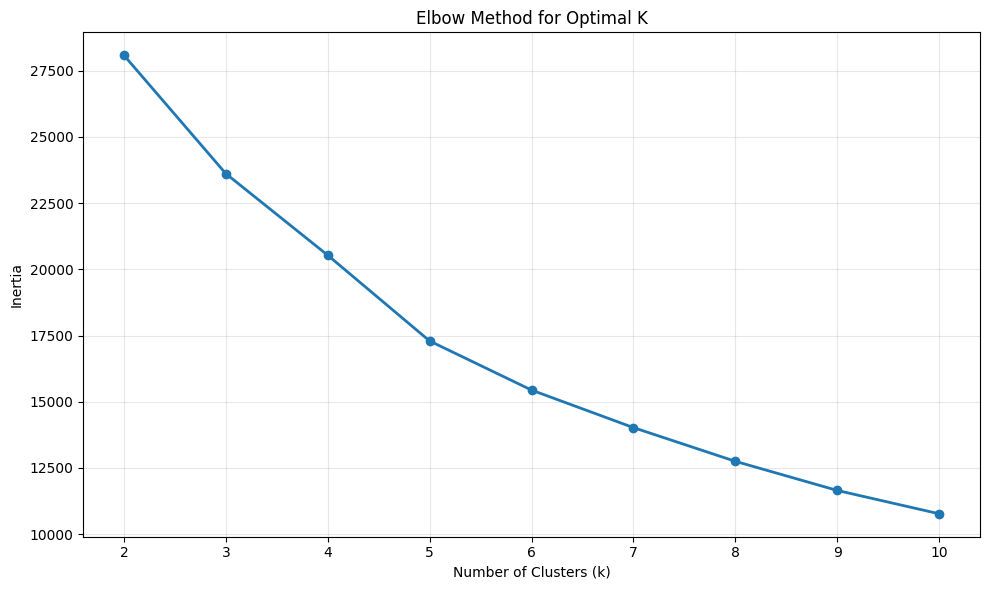


Optimal number of clusters: 3
Cluster distribution:
0     197
1    2607
2     732
Name: count, dtype: int64


In [78]:
# Elbow Method
inertias = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o', linewidth=2)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Apply K-Means
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_train_scaled)

print(f"\nOptimal number of clusters: {optimal_k}")
print("Cluster distribution:")
print(pd.Series(clusters).value_counts().sort_index())

## Conclusion

In this project, we used the **Predict Students Dropout and Academic Success dataset** to predict whether a university student will:
   - Dropout
   - Continue (Enrolled)
   - Graduate Successfully

### 🔍 What we did in this project

 - Loaded and cleaned the original dataset (4,424 student records)
 - Encoded the categorical target Target into numerical labels
 - Selected important academic, demographic, and financial features, including:
     - Age at enrollment
     - Admission grade
     - Scholarship holder
     - Tuition fees up to date
     - First and second semester grades, enrolled subjects, and approvals
     - International status
 - Applied training/test split with feature scaling
 - Trained multiple machine learning models, including:
     - Logistic Regression
     - Decision Tree
     - Random Forest
     - K-Nearest Neighbors
     - Support Vector Machine
     - Neural Network (MLP)
Ensemble learning (Bagging, Gradient Boosting)
 - Compared model performances using accuracy, precision, recall, and F1-Score
 - Visualized results using confusion matrices, performance graphs, PCA, cross-validation, clustering, and more

### 🎯 Connection to Real-World Objectives

This project supports many practical education management goals:

#### 1️⃣ Early Detection of At-Risk Students

By identifying students likely to drop out early, universities can provide:
 - Counseling
 - Mentoring
 - Financial aid
 - Academic support

#### 2️⃣ Better Resource Allocation

Universities can use model predictions to allocate limited resources (tutors, workshops, advisors) to students who need them most.

#### 3️⃣ Academic & Policy Strategy Evaluation

The model highlights which factors strongly influence dropout and success, including:
 - Admission grade
 - Scholarship status
 - Tuition payment status
 - Course load and semester performance
 - Decisions and policies can be improved based on real data rather than assumptions.

#### 4️⃣ Data-Driven Decision Making

Administrators can use predictions to:
 - Reduce dropout rates
 - Improve retention
 - Increase graduation success
 - Design supportive educational programs

#### 5️⃣ Improving Educational Outcomes

Machine learning insights can help universities:
 - Build personalized academic support plans
 - Monitor struggling students
 - Improve the overall success rate of the institution

This simple model demonstrates how basic machine learning techniques can support **data-driven decision making** in education, even with straightforward features and algorithms.

